In [1]:
from heston import*

import numpy as np
import random

In [2]:
## Filtre APF

In [3]:
import matplotlib.pyplot as plt
def plot_data(data, labels = ["Simulated Returns"], title=""):
    
    # Plotting the simulated return
    plt.figure(figsize=(10, 4))
    for df, label in zip(data, labels):
        plt.plot(df, label=label)
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
S0 = 100
K = 100
tau = 1
lamda = 4
v_bar = 0.03
rho = -0.5
sigma = 0.1
eta = 0.4
r = 0.05

np.random.seed(42)
S, C, v = SimHeston(S0, K, tau, r, lamda, v_bar, rho, sigma, eta, size = 252)

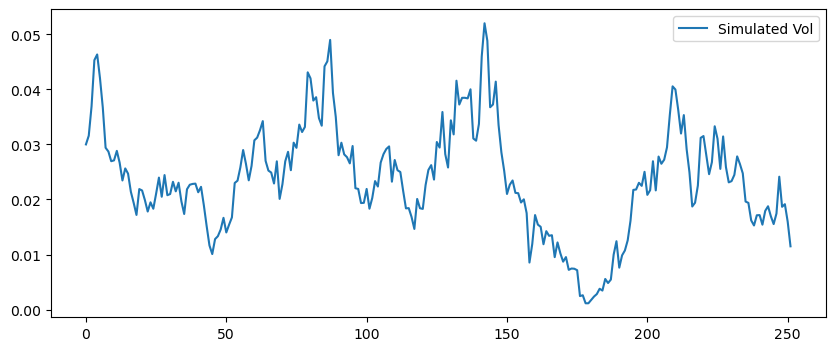

In [5]:
plot_data([v],["Simulated Vol"])

In [6]:
M= 2
boot_vol = Bootstrap_Heston(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)
apf_vol = APF(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)
apf_modif_vol = APF_modified(C, S, K, tau, r, lamda, v_bar, rho, sigma, eta, M=M)

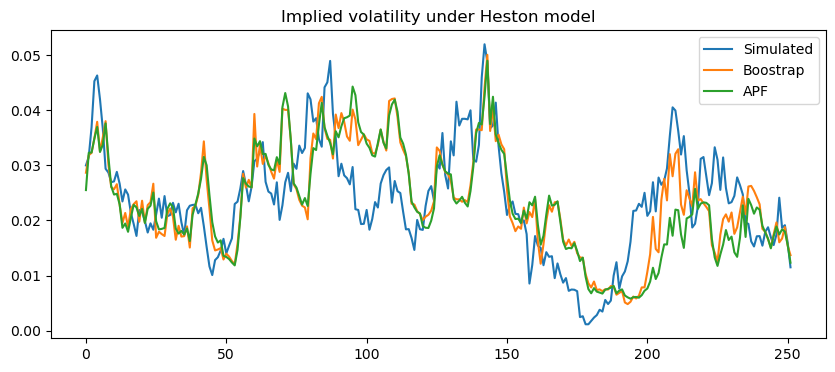

In [8]:
plot_data([v, boot_vol, apf_vol, apf_modif_vol],["Simulated", "Boostrap", "APF", "APF modified"], title = "Implied volatility under Heston model")

In [9]:
C_pred_bootsrtap = np.array([heston(stock_price = S[t],
                         initial_vol = b_vol[t],
                         kappa = lamda,
                         theta = v_bar, 
                         lambd = eta, 
                         rho = rho, 
                         r = r, 
                         T = tau,
                         K = K) for t in range(len(S))])

C_pred_apf = np.array([heston(stock_price = S[t],
                         initial_vol = apf_vol[t],
                         kappa = lamda,
                         theta = v_bar, 
                         lambd = eta, 
                         rho = rho, 
                         r = r, 
                         T = tau,
                         K = K) for t in range(len(S))])

C_pred_apf_modif = np.array([heston(stock_price = S[t],
                         initial_vol = apf_modif_vol[t],
                         kappa = lamda,
                         theta = v_bar, 
                         lambd = eta, 
                         rho = rho, 
                         r = r, 
                         T = tau,
                         K = K) for t in range(len(S))])


In [10]:
mse_bootstrap = np.mean((v-b_vol)**2)
mse_apf = np.mean((v-apf_vol)**2)
mse_apf_modif = np.mean((v-apf_modif_vol)**2)

print("MSE BOOTSTRAP:\t", mse_bootstrap)
print("MSE APF:\t", mse_apf)
print("MSE APF modified:\t", mse_apf_modif)

MSE BOOTSTRAP:	 6.484762829747467e-05
MSE APF:	 7.888688981305232e-05


In [11]:
mse_bootstrap = np.mean((C-C_pred_bootsrtap)**2)
mse_apf = np.mean((C-C_pred_apf)**2)
mse_apf_modif = np.mean((C-C_pred_apf_modif)**2)

print("MSE BOOTSTRAP:\t", mse_bootstrap)
print("MSE APF:\t", mse_apf)
print("MSE APF modified:\t", mse_apf_modif)

MSE BOOTSTRAP:	 0.08147583885815932
MSE APF:	 0.08996446624662396


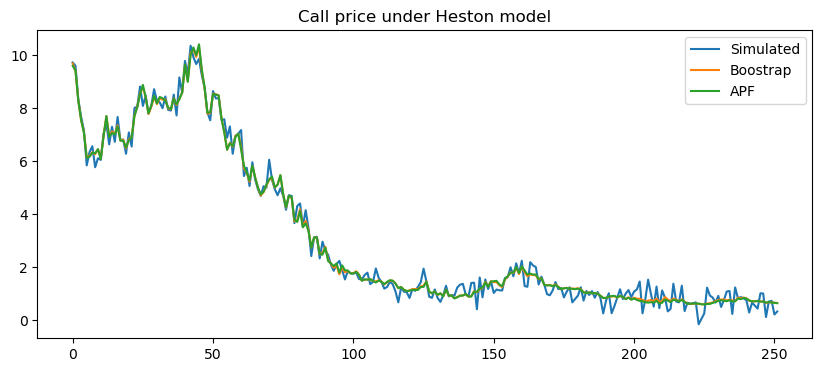

In [12]:
plot_data([C, C_pred_bootsrtap, C_pred_apf, C_pred_apf_modif],["Simulated", "Boostrap", "APF", "APF modified"], title = "Call price under Heston model")